In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("..\Dataset\sleep_merged.tsv",sep='\t')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\okial\AppData\Local\Temp\ipykernel_17008\3111639839.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("..\Dataset\sleep_merged.tsv",sep='\t')


,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.000,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
1,African giant pouched rat,Cricetomys,Rodentia,omni,NaN,1.000,6.6,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.0,8.7,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
4,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.7,16.6,7.4,NaN,NaN,NaN,25.0,5.0,2.0,3.0


In [12]:
len(df)
# 87 rows

87

In [13]:
df.describe()

# Min BrainWt 0.0 ???
# Visible Outliers

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
count,87.000000,87.000000,87.000000,87.000000,47.000000,63.000000,54.000000,54.000000,58.000000,58.000000,58.000000
mean,161.384310,196.405287,10.608046,13.393103,8.736170,1.979365,20.240741,139.268519,2.844828,2.362069,2.586207
std,768.846727,793.628150,4.465793,4.467481,3.679522,1.474204,18.757011,144.696322,1.496214,1.575005,1.426989
min,0.005000,0.000000,1.900000,4.100000,2.100000,0.100000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,0.202500,0.000000,8.150000,10.250000,6.300000,0.900000,6.125000,36.750000,2.000000,1.000000,1.000000
50%,2.000000,5.500000,10.300000,13.700000,8.400000,1.800000,15.100000,79.000000,3.000000,2.000000,2.000000
75%,43.165000,64.000000,13.750000,15.850000,11.000000,2.500000,28.000000,195.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,19.900000,22.100000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000


In [6]:
df.isna().sum()
# Many columns with missing values

Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan        33
Gestation       33
Predation       29
Exposure        29
Danger          29
dtype: int64

In [11]:
df.Species.value_counts()

# Every species is unique in the data

Species
African elephant             1
Northern fur seal            1
Potto                        1
Potoroo                      1
Pilot whale                  1
                            ..
Genet                        1
Galago                       1
European hedgehog            1
Eastern american mole        1
Western american chipmunk    1
Name: count, Length: 87, dtype: int64

In [12]:
df.Genus.value_counts()

Genus
Spermophilus    3
Panthera        3
Equus           2
Vulpes          2
Canis           2
               ..
Priodontes      1
Genetta         1
Galago          1
Erinaceus       1
Eutamias        1
Name: count, Length: 80, dtype: int64

In [13]:
df.Order.value_counts()

Order
Rodentia           22
Carnivora          14
Primates           13
Artiodactyla        6
Soricomorpha        5
Hyracoidea          3
Cetacea             3
Perissodactyla      3
Didelphimorphia     3
Diprotodontia       2
Proboscidea         2
Cingulata           2
Erinaceomorpha      2
Chiroptera          2
Lagomorpha          1
Monotremata         1
Afrosoricida        1
Pilosa              1
Scandentia          1
Name: count, dtype: int64

In [14]:
df.Vore.value_counts()

Vore
herbi      37
carni      22
omni       20
insecti     8
Name: count, dtype: int64

In [15]:
df.Conservation.value_counts()
# To keep ?

Conservation
lc              30
domesticated    10
vu               7
en               4
nt               4
cd               2
cr               1
Name: count, dtype: int64

<Axes: xlabel='Vore', ylabel='Count'>

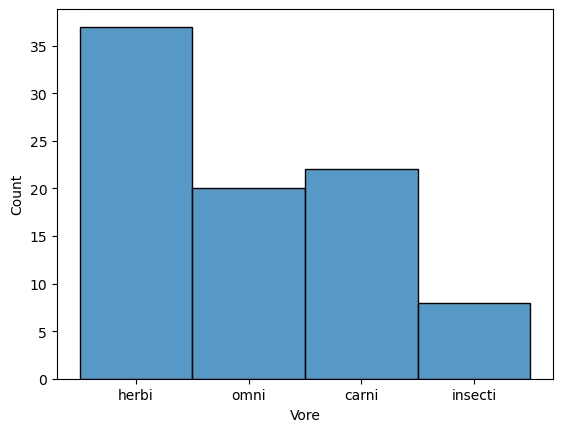

In [21]:
sns.histplot(df,x="Vore")

<Axes: xlabel='BodyWt'>

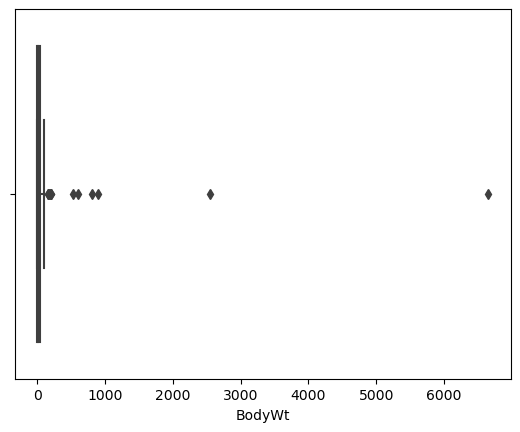

In [22]:
sns.boxplot(df,x="BodyWt")
# Some outliers

<Axes: xlabel='BrainWt'>

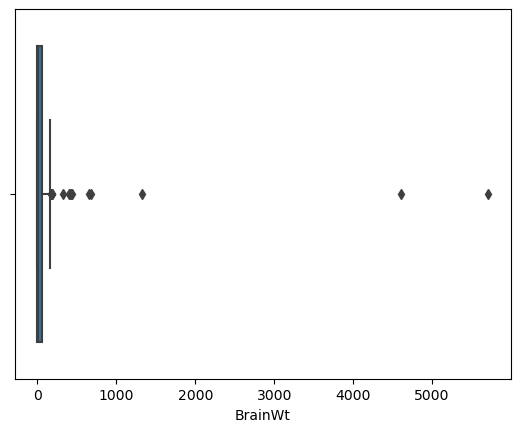

In [23]:
sns.boxplot(df,x="BrainWt")
# Some outliers

<Axes: xlabel='Awake', ylabel='Count'>

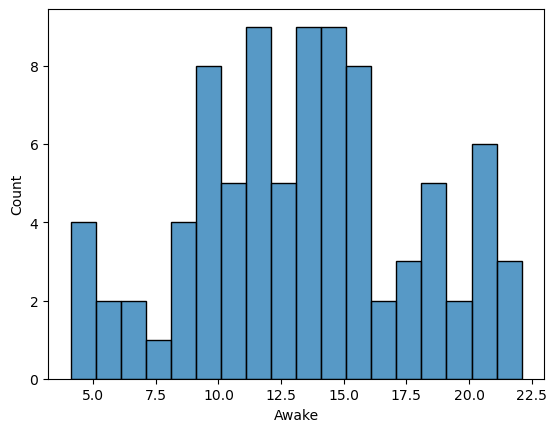

In [30]:
sns.histplot(df,x="Awake",binwidth=1)

<Axes: xlabel='LifeSpan'>

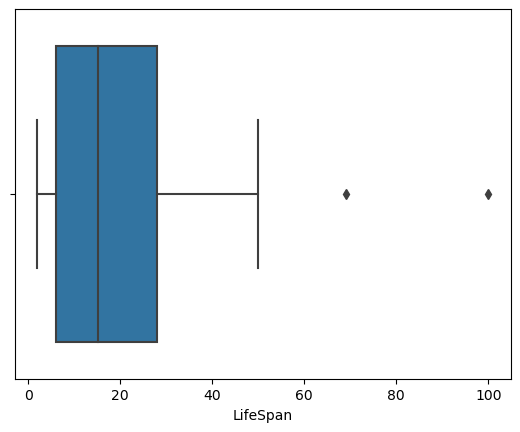

In [35]:
sns.boxplot(df,x="LifeSpan")

<Axes: xlabel='Gestation', ylabel='Count'>

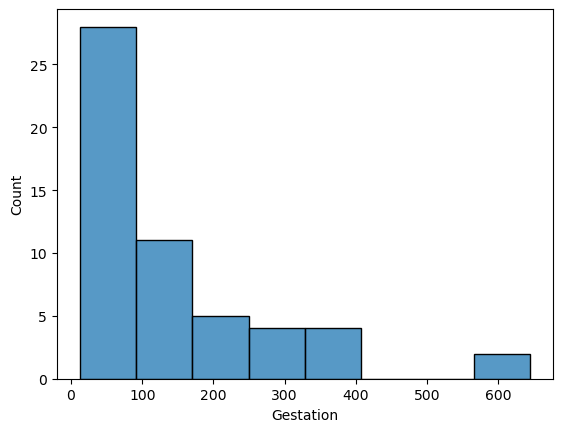

In [36]:
sns.histplot(df,x="Gestation")

In [40]:
df.Predation.value_counts()

Predation
1.0    14
2.0    14
5.0    13
3.0    10
4.0     7
Name: count, dtype: int64

In [41]:
df.Exposure.value_counts()

Exposure
1.0    26
2.0    12
5.0    11
4.0     5
3.0     4
Name: count, dtype: int64

In [42]:
df.Danger.value_counts()

Danger
1.0    18
2.0    13
3.0    10
4.0     9
5.0     8
Name: count, dtype: int64

In [44]:
fullday =  df.Awake + df.TotalSleep
fullday.value_counts()
# 2 strange values

24.00    85
24.05     1
24.05     1
Name: count, dtype: int64

In [48]:
df.loc[df.NonDreaming.isna(),["TotalSleep","NonDreaming","Dreaming"]]

,TotalSleep,NonDreaming,Dreaming
0,3.3,NaN,NaN
2,8.7,NaN,NaN
3,12.5,NaN,NaN
4,16.6,NaN,NaN
8,5.2,NaN,NaN
10,3.5,NaN,0.4
11,12.1,NaN,NaN
14,5.6,NaN,NaN
15,11.3,NaN,1.1
17,11.5,NaN,NaN


In [49]:
df_mod = df.copy()

In [59]:
df_mod["SleepComputed"] = df_mod.NonDreaming + df_mod.Dreaming
df_mod.loc[df_mod.NonDreaming > 0,["TotalSleep","SleepComputed","NonDreaming","Dreaming"]]
# Discrepancy in the data TotalSleep <> Dreaming + NonDreaming (SleepComputed)

,TotalSleep,SleepComputed,NonDreaming,Dreaming
1,8.3,8.3,6.3,2.0
5,3.9,3.9,2.1,1.8
6,9.4,9.8,9.1,0.7
7,19.7,19.7,15.8,3.9
9,4.4,6.2,5.2,1.0
12,9.7,9.7,8.3,1.4
13,12.5,12.5,11.0,1.5
16,4.0,3.9,3.2,0.7
19,10.3,10.3,7.6,2.7
21,12.5,14.5,10.9,3.6


In [84]:
NonDreamingtoFill = df_mod.loc[(df_mod.NonDreaming.isna()) & (df_mod.Dreaming > 0),["TotalSleep","NonDreaming","Dreaming"]]
NonDreamingtoFill

,TotalSleep,NonDreaming,Dreaming
10,3.5,NaN,0.4
15,11.3,NaN,1.1
18,7.7,NaN,0.9
20,10.1,NaN,2.9
22,3.1,NaN,0.4
29,1.9,NaN,0.3
34,6.3,NaN,0.6
37,14.9,NaN,2.3
50,14.2,NaN,1.9
51,9.5,NaN,0.9


In [88]:
NonDreamingFilled = NonDreamingtoFill.TotalSleep - NonDreamingtoFill.Dreaming
NonDreamingFilled

10     3.1
15    10.2
18     6.8
20     7.2
22     2.7
29     1.6
34     5.7
37    12.6
50    12.3
51     8.6
55     7.3
61     2.6
62     9.6
73     8.2
76    12.8
77    10.4
78    12.2
dtype: float64

In [94]:
df_mod.isna().sum()

Species           0
Genus             0
Order             0
Vore              0
Conservation     29
BodyWt            0
BrainWt           0
TotalSleep        0
Awake             0
NonDreaming      23
Dreaming         24
LifeSpan         33
Gestation        33
Predation        29
Exposure         29
Danger           29
SleepComputed    41
dtype: int64

In [95]:
df_mod.loc[(df_mod.Dreaming.isna()) & (df_mod.NonDreaming > 0),["TotalSleep","NonDreaming","Dreaming"]]

,TotalSleep,NonDreaming,Dreaming
71,8.6,8.6,NaN


In [96]:
df_mod.loc[(df_mod.Dreaming.isna()) & (df_mod.NonDreaming > 0),"Dreaming"] = 0
df_mod.isna().sum()

Species           0
Genus             0
Order             0
Vore              0
Conservation     29
BodyWt            0
BrainWt           0
TotalSleep        0
Awake             0
NonDreaming      23
Dreaming         23
LifeSpan         33
Gestation        33
Predation        29
Exposure         29
Danger           29
SleepComputed    41
dtype: int64

In [99]:
df_mod.loc[df_mod.Dreaming.isna()]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,SleepComputed
0,African elephant,Loxodonta,Proboscidea,herbi,vu,6654.000,5712.0,3.3,20.70,NaN,NaN,38.6,645.0,3.0,5.0,3.0,NaN
2,African striped mouse,Rhabdomys,Rodentia,omni,NaN,0.044,0.0,8.7,15.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.50,NaN,NaN,14.0,60.0,1.0,1.0,1.0,NaN
4,Arctic ground squirrel,Spermophilus,Rodentia,herbi,lc,0.920,5.7,16.6,7.40,NaN,NaN,NaN,25.0,5.0,2.0,3.0,NaN
8,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.330,0.0,5.2,18.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Cheetah,Acinonyx,Carnivora,carni,lc,50.000,0.0,12.1,11.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Common porpoise,Phocoena,Cetacea,carni,vu,53.180,0.0,5.6,18.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Deer mouse,Peromyscus,Rodentia,herbi,NaN,0.021,0.0,11.5,12.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Eastern american chipmunk,Tamias,Rodentia,herbi,NaN,0.112,0.0,15.8,8.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Gorilla,Gorilla,Primates,herbi,cr,207.000,406.0,12.0,12.00,NaN,NaN,39.3,252.0,1.0,4.0,1.0,NaN
